In [1]:
import pandas as pd

## Open Wikipedia frequency list
#### https://github.com/IlyaSemenov/wikipedia-word-frequency

In [2]:


df_word_freq = pd.read_csv (r'words_frequency.txt',
                            delim_whitespace=True,
                           names=["word", "frequency"])   

df_word_freq = df_word_freq[df_word_freq['word'].str.contains('[a-z]', na=False)]


df_word_freq

,word,frequency
0,the,175029308
1,of,83135650
2,in,71869293
3,and,71473317
4,a,51438935
...,...,...
2676536,houryuuji,3
2676537,groendorpen,3
2676538,witotoanas,3
2676540,kimely,3


# Run the code

In [63]:
lst_char_bad = []
lst_char_good = []
lst_char_0 = []
lst_char_1 = []
lst_char_2 = []
lst_char_3 = []
lst_char_4 = []
char_0 = ''
char_1 = ''
char_2 = ''
char_3 = ''
char_4 = ''

# initialize data of lists.
data = {'letter':['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']}
 
# Create DataFrame
df_letters = pd.DataFrame(data)
df_letters['pct_likely'] = ''

## Limit to 5 letter words and clean up

In [64]:
#limit to words of 5
df_word_freq = df_word_freq[df_word_freq['word'].str.len() == 5]

#just keep alpha
df_word_freq = df_word_freq[df_word_freq['word'].str.isalpha() == True]

#get frequency percent
df_possible_words = df_word_freq.copy()
max_frequency = df_possible_words['frequency'].max()
df_possible_words['word_pct'] = ((df_possible_words['frequency']/max_frequency) * 100).round(4)

#set blank status
df_possible_words['word_status'] = ''


df_possible_words

,word,frequency,word_pct,word_status
21,which,7317169,100.0000,
27,first,5617559,76.7723,
30,their,4974932,67.9898,
31,after,4914542,67.1645,
44,other,3386983,46.2882,
...,...,...,...,...
2676395,awbār,3,0.0000,
2676398,tatnb,3,0.0000,
2676426,ulagg,3,0.0000,
2676469,şalāl,3,0.0000,


### Word guess

#### The following legend
- 0 = not valid letter
- 1 = right letter wrong place
- 2 = right letter right place

In [65]:
word_guess = input()

#change input to something else
word_guess_location = input()

canoe
20120


In [66]:
#get list of charcacters to drop
for i, v in enumerate(word_guess_location):
    if (v == '0') and (v not in lst_char_good):
        lst_char_bad.append(word_guess[i])
    elif v =='2':
        if (i == 0) and (char_0 == ''):
            char_0 = word_guess[i]
            lst_char_good.append(word_guess[i])
        elif (i == 1) and (char_1 == ''):
            char_1 = word_guess[i]
            lst_char_good.append(word_guess[i])
        elif (i == 2) and (char_2 == ''):
            char_2 = word_guess[i]
            lst_char_good.append(word_guess[i])
        elif (i == 3) and (char_3 == ''):
            char_3 = word_guess[i]
            lst_char_good.append(word_guess[i])
        elif (i == 4) and (char_4 == ''):
            char_4 = word_guess[i]
            lst_char_good.append(word_guess[i])
    elif v == '1':
        lst_char_good.append(word_guess[i])
        if i == 0:
            lst_char_0.append(word_guess[i])
        elif i == 1:
            lst_char_1.append(word_guess[i])
        elif i == 2:
            lst_char_2.append(word_guess[i])
        elif i == 3:
            lst_char_3.append(word_guess[i])
        elif i == 4:
            lst_char_4.append(word_guess[i])       
        

70


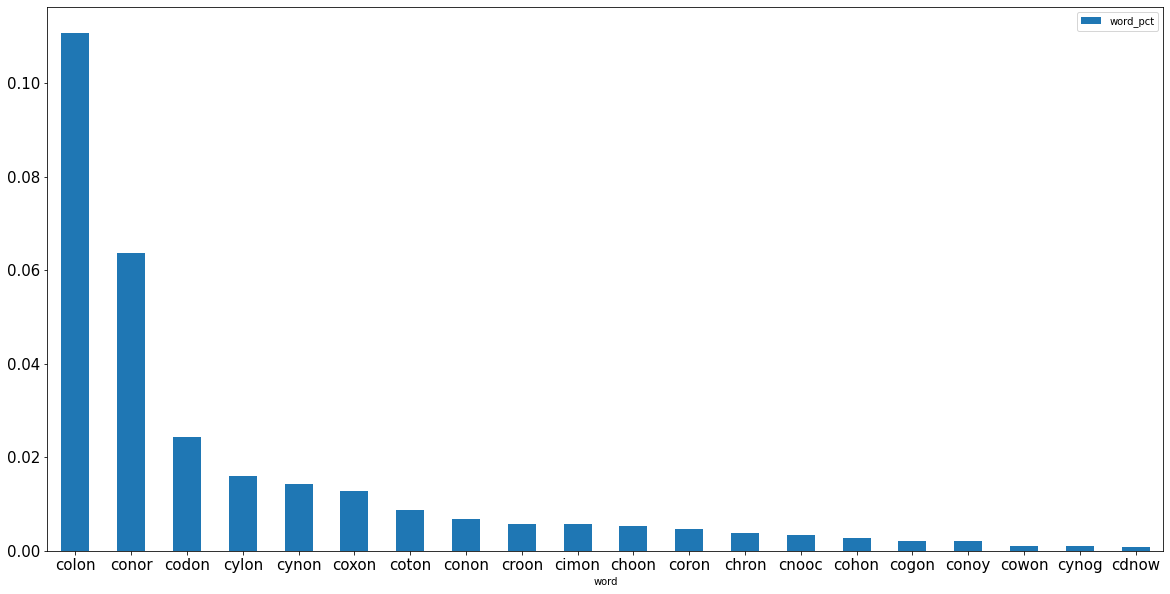

In [67]:
#remove good characters from bad character list
lst_char_bad = [x for x in lst_char_bad if x not in lst_char_good]

#drop bad characters
df_possible_words = df_possible_words[~df_possible_words.word.str.contains('|'.join(lst_char_bad))]

#keep good characters
for lst_i in lst_char_good:
    df_possible_words = df_possible_words[df_possible_words.word.str.contains('|'.join(lst_i))]

#iterate each row
#keep characters in the right spot
df_possible_words = df_possible_words.reset_index(drop=True)

for index, row in df_possible_words.iterrows():
#    if row['word_status'] == 'Keep':
#        df_possible_words.at[index, 'word_status'] = 'Keep'
#    else:
    for i_c, c in enumerate(row['word']):
        if i_c == 0:
            if (c == char_0) and (char_0 != ''):
                df_possible_words.at[index, 'word_status'] += 'Keep0'
            elif (c != char_0) and (char_0 != ''):
                df_possible_words.at[index, 'word_status'] += 'Delete0'

        elif i_c == 1:
            if (c == char_1) and (char_1 != ''):
                df_possible_words.at[index, 'word_status'] += 'Keep1'
            elif (c != char_1) and (char_1 != ''):
                df_possible_words.at[index, 'word_status'] += 'Delete1'

        elif i_c == 2:
            if (c == char_2) and (char_2 != ''):
                df_possible_words.at[index, 'word_status'] += 'Keep2'
            elif (c != char_2) and (char_2 != ''):
                df_possible_words.at[index, 'word_status'] += 'Delete2'

        elif i_c == 3:
            if (c == char_3) and (char_3 != ''):
                df_possible_words.at[index, 'word_status'] += 'Keep3'
            elif (c != char_3) and (char_3 != ''):
                df_possible_words.at[index, 'word_status'] += 'Delete3'

        elif i_c == 4:
            if (c == char_4) and (char_4 != ''):
                df_possible_words.at[index, 'word_status'] += 'Keep4'
            elif (c != char_4) and (char_4 != ''):
                df_possible_words.at[index, 'word_status'] += 'Delete4'




    else:
        row['word_status'] ==''


#get rid of Delete columns
df_possible_words = df_possible_words[df_possible_words["word_status"].str.contains("Delete")==False]    
#if there are any Keeps, Keep them
if len(df_possible_words[df_possible_words['word_status'].str.contains('Keep')]) > 0:
    df_possible_words = df_possible_words[~df_possible_words["word_status"].str.contains("Keep")==False]    

df_possible_words['word_status'] = ''

print(len(df_possible_words))

df_possible_words_tmp = df_possible_words.head(20)
ax = df_possible_words_tmp.plot.bar(x='word', y='word_pct', rot=0,figsize=(20, 10), fontsize=15)

## Letters to guess

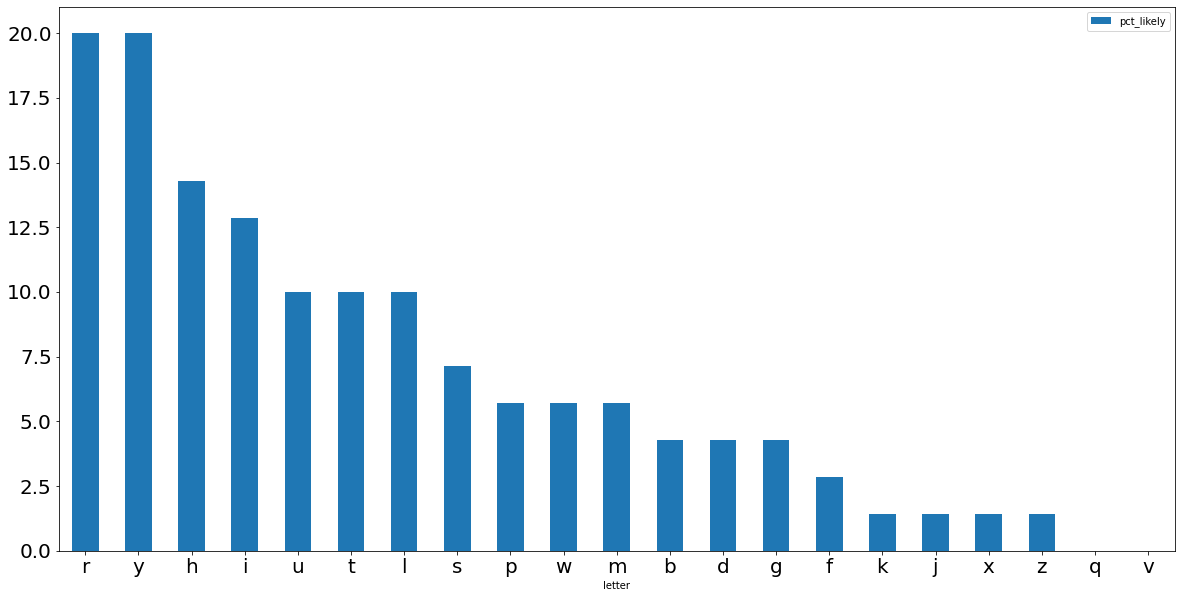

In [68]:
len_words = len(df_possible_words)

#exclude letters already guessed
df_letters = df_letters[~df_letters['letter'].isin(lst_char_bad)]
df_letters = df_letters[~df_letters['letter'].isin(lst_char_good)]

#iterate through dataframe of alphabet
for index, row in df_letters.iterrows():
    df_letters.at[index, 'pct_likely'] = round((len(df_possible_words[df_possible_words['word'].str.contains(row['letter'])]) / len_words) * 100,2)

df_letters = df_letters.sort_values(by=['pct_likely'], ascending=False)
    
ax = df_letters.plot.bar(x='letter', y='pct_likely', rot=0,figsize=(20, 10), fontsize=20)


In [69]:

#df_possible_words['word_status'] = ''

In [70]:
print('lst_char_bad ') 
print(lst_char_bad)
print('lst_char_good ') 
print(lst_char_good)
print('lst_char_0 ')
print(lst_char_0)
print('lst_char_1 ')
print(lst_char_1)
print('lst_char_2 ')
print(lst_char_2)
print('lst_char_3 ')
print(lst_char_3)
print('lst_char_4 ')
print(lst_char_4)
print('char_0: ' + char_0)
print('char_1: ' + char_1)
print('char_2: ' + char_2)
print('char_3: ' + char_3)
print('char_4: ' + char_4)

df_letters



lst_char_bad 
['a', 'e']
lst_char_good 
['c', 'n', 'o']
lst_char_0 
[]
lst_char_1 
[]
lst_char_2 
['n']
lst_char_3 
[]
lst_char_4 
[]
char_0: c
char_1: 
char_2: 
char_3: o
char_4: 


,letter,pct_likely
17,r,20.0
24,y,20.0
7,h,14.29
8,i,12.86
20,u,10.0
19,t,10.0
11,l,10.0
18,s,7.14
15,p,5.71
22,w,5.71
